In [ ]:
#Libs Necessárias

#Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

#Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

#Lib para ignorar avisos
import warnings

#Desabilitando avisos
warnings.filterwarnings('ignore')

In [ ]:
#Leitura da base de dados
base_dados = pd.read_excel('Vase_004 - Magalu - Sem Resolução.xlsx')

#Verificando os dados
base_dados.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


In [ ]:
#Verificando a dimensão dos dados
base_dados.shape

(247, 7)

In [ ]:
#Verifica o formato dos dados
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [ ]:
#Séries temporais

#Criando uma variável com a base de dados tendo a data como index
dados = base_dados.set_index('Data')

#Verificando a nova base de dados
dados.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


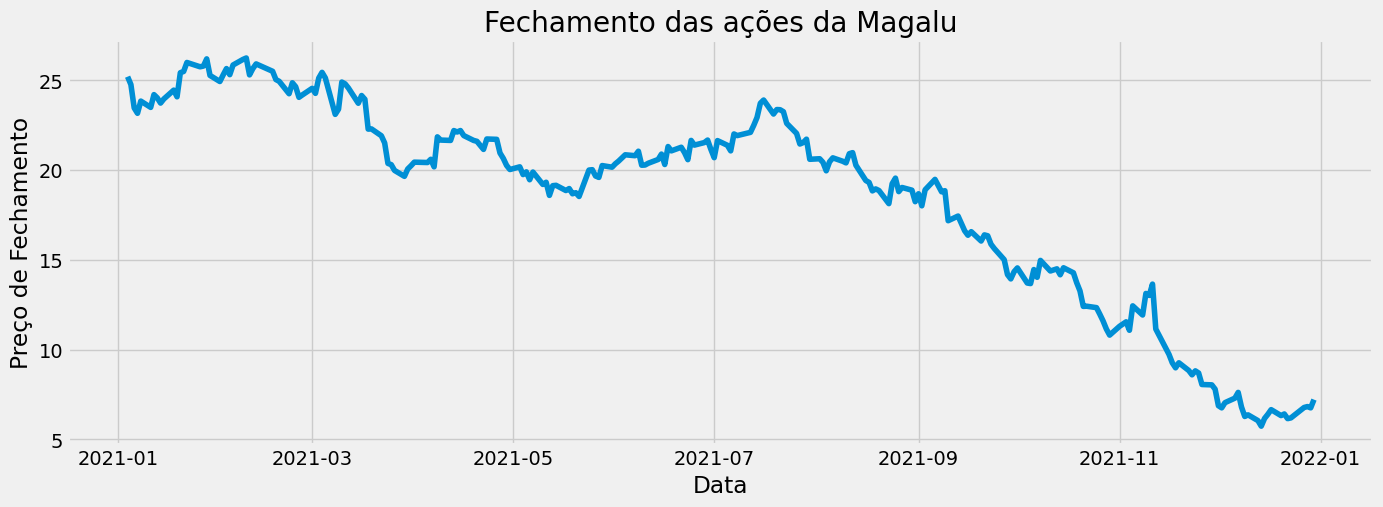

In [ ]:
#Criando um gráfico mostrando o fechamento de cada data das ações da Magalu
plt.figure(figsize=(15,5)) #Alterando o tamanho da figura
plt.style.use('fivethirtyeight') #Alterando o estilo
plt.title('Fechamento das ações da Magalu') #Título
plt.ylabel('Preço de Fechamento') #Nome do eixo y
plt.xlabel('Data') #Nome do eixo x
plt.plot(dados['Fechamento']);

In [ ]:
#Criando a média móvel e a média tendencia
media_movel = dados['Fechamento'].rolling(5).mean()
media_tendencia = dados['Fechamento'].rolling(30).mean()

,Fechamento
Data,
2021-01-04,NaN
2021-01-05,NaN
2021-01-06,NaN
2021-01-07,NaN
2021-01-08,24.084000
2021-01-11,23.742000
2021-01-12,23.630000
2021-01-13,23.742000
2021-01-14,23.856000


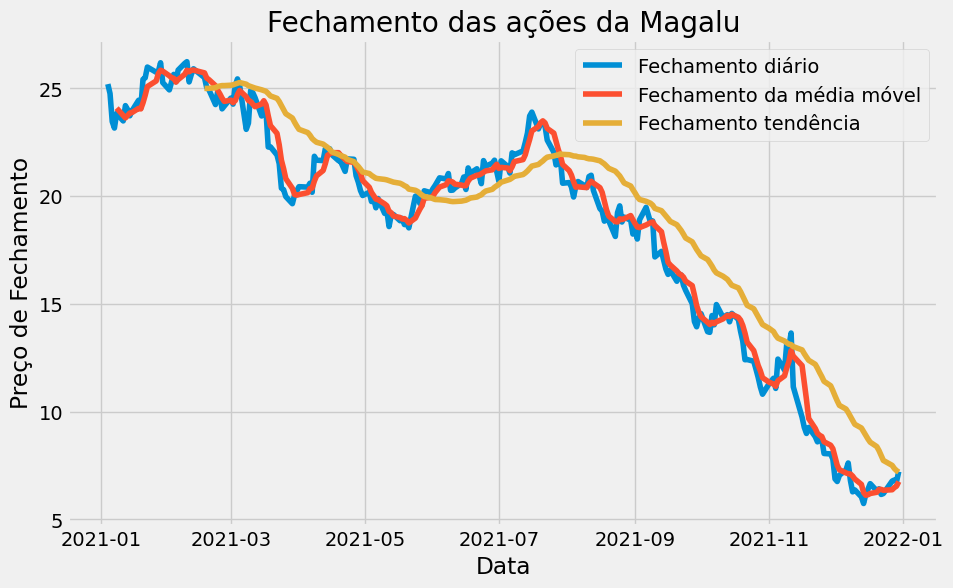

In [ ]:
#Plotando o gráfico de todo dia, a cada 5 e a cada 30 dias
plt.figure(figsize=(10,6)) #Alterando o tamanho da figura
plt.style.use('fivethirtyeight') #Alterando o estilo
plt.title('Fechamento das ações da Magalu') #Título
plt.ylabel('Preço de Fechamento') #Nome do eixo y
plt.xlabel('Data') #Nome do eixo x
plt.plot(dados['Fechamento'], label='Fechamento diário') #Plot de todos os dias
plt.plot(media_movel, label='Fechamento da média móvel') #Plot de 5 em 5
plt.plot(media_tendencia, label='Fechamento tendência'); #Plot a cada 30
plt.legend(); #Legenda

<Axes: xlabel='Data', ylabel='Fechamento'>

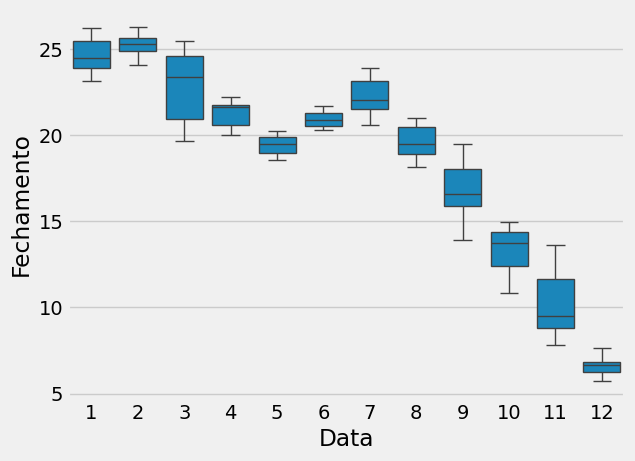

In [ ]:
#Fazendo um boxplot de cada mês
mes = base_dados['Data'].dt.month
sns.boxplot(data=base_dados, x=mes, y='Fechamento')

In [ ]:
#Fazendo um gráfico candle
grafico = go.Figure(
    data=[
        go.Candlestick(
            x = dados.index,
            open = dados['Abertura'],
            high= dados['Maior'],
            low= dados['Menor'],
            close= dados['Fechamento']
        )
    ]
)
grafico.show()